# REMOVE BEFORE TURNING THIS IN!!!!!!! - Instructions

<h1><center>Financial Applications of Time Series</center></h1>
<center> David Tran, Frank Sclafani, Matthew Przybyla, and Brandon Hill</center>
<center> MSDS 7333 - Quantifying the World - Case Study 4 (Unit 4)</center>
<center> June 5, 2018</center>

# Notebook Navigation

[1) Abstract](#Abstract) 

[2) Introduction](#Introduction)

[3) Methods](#Methods) 

[4) Results](#Results) 

[5) Future Work, Discussion Conclusions, and Next Steps](#Future Work, Discussion Conclusions, and Next Steps) 

[6) References](#References) 

## Abstract

- Using Python libraries to handle financial time series data:
* One of the most time-consuming issues in working with financial data is the so-called data alignment problem. (pg.330)
    * Two related time series may have indexes that don't line up perfectly, or two DataFrame objects might have columns or row labels that don't match.
    * pandas take an alternate approach by automatically aligning data in arithmetic operations.
* In this section, I'll describe a simplified cross-sectional momentum portfolio and show how you might explore a grid of model parameterizations. First, I'll load historical prices for a portfolio of financial and technology stocks: (pg.345)
    * Cummaltive returns
    * momentum
* Rolling Correlation and Linear Regression (pg. 350)
    


## Introduction

Financial instituions or FIs, such as banks and traders, heavily rely on financial modeling and forecasting in order to create a portfolio or risk recommendations to their clients. The performance and research by financial institutions are limited by their headcount and resources. The data science fields has different models and algorithms that can handle large amounts of financial data and analyze it in order for trend and predictive analysis. For our analysis, we have chosen the Signal Frontier Analysis method. 

The method consist of a simplified cross-sectional momentum portfolio and shows how someone would explore a grid of model parameterizations. The financial stock data came from a Yahoo Finance API. The stocks that were chosen are: Amazon (AMZN), Walmart (WMT), Target (TGT), Best Buy (BBY), and Costco (COST). All of these companies are in the retail industry, such as consumer goods, retail, or electronics. 

The data range of the data set is from January 1, 2013 to May 1, 2018. The analysis will be based off of its daily closing price. The analysis will allow to understand and create insight of different trends, correlations, and findings. All of the findings will be explained in the Results down below. 

## Background 

<font font-family= "Ariel"> The stock market volumes dataset was collected via the Yahoo Finance API. It contains 1,129 observations and 6 variables. There is no missing data for any of the variables in these 1,129 observations. Our objective is to analyze the historical daily adjusted closing stock prices for 5 major retail companies for the 4.5-year span between June 4th, 2013 and May 1st, 2018. A full list of variable descriptions, including the Datetime variable in which the observation was captured and the data is indexed by, can be found in Table 1: </font>

|    Variable   |                                         Description                                         |    Type    |
|:-------------:|:-------------------------------------------------------------------------------------------:|:----------:|
| DatetimeIndex | Date observation was collected. (Index of data)                                             |  Ordinal   |
| AMZN          | Amazon.com, Inc. close price for both dividends and.             | Continuous |
| WMT           | Walmart Inc. close price for both dividends.                   | Continuous |
| TGT           | Target Corporation close price for both dividends.           | Continuous |
| BBY           | Best Buy Co., Inc. close price for both dividends.           | Continuous |
| COST          | Costco Wholesale Corporation close price for both   dividends. | Continuous |

## Methods - Signal Frontier Analysis

In [1]:
# This cell just tells the notebook to set the width of the cells in relation to the screen width
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [6]:
print('Loading globals ...')

import datetime
import pandas as pd
start_dt=datetime.datetime(2013,1,1)
end_dt=datetime.datetime(2018,5,1)
from pandas_datareader import data as web

from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

print('Globals Loaded')

Loading globals ...
Globals Loaded


In [17]:
print('')
print('Loading Data')


stock='AMZN'
px=pd.DataFrame({'AMZN':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['WMT','TGT', 'BBY','COST']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

print('File Has Been Loaded')


Loading Data
5y
5y
5y
5y
5y
File Has Been Loaded


http://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

A series of time can be generated using �date_range� command. In below code, �periods� is the total number of samples; whereas freq = �M� represents that series must be generated based on �Month�.

By default, pandas consider �M� as end of the month. Use �MS� for start of the month. Similarly, other options are also available for day (�D�), business days (�B�) and hours (�H�) etc.

In [19]:
px = px.asfreq('B').fillna(method='pad')

In [18]:
px

,AMZN,WMT,TGT,BBY,COST
date,,,,,
2013-06-04,265.70,66.3049,60.7427,23.5235,97.3715
2013-06-05,267.17,65.7025,59.6044,23.2574,96.0604
2013-06-06,267.83,66.0343,59.6809,23.7639,97.7498
2013-06-07,276.87,66.6455,59.7658,23.6344,97.3011
2013-06-10,281.07,66.1390,59.3581,24.2218,97.0635
2013-06-11,274.78,65.7025,59.4600,24.0922,96.8083
...,...,...,...,...,...
2018-04-24,1460.09,85.9882,69.9301,73.1700,191.9502
2018-04-25,1460.17,86.6242,70.5350,74.3800,193.4059


In [10]:
plt.close('all')

In [11]:
px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1281 entries, 2013-06-04 to 2018-05-01
Freq: B
Data columns (total 5 columns):
AMZN    1281 non-null float64
WMT     1281 non-null float64
TGT     1281 non-null float64
BBY     1281 non-null float64
COST    1281 non-null float64
dtypes: float64(5)
memory usage: 60.0 KB


In [12]:
px.describe()

,AMZN,WMT,TGT,BBY,COST
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,639.395592,70.822293,62.165893,37.963498,137.571045
std,331.607050,9.676568,8.265301,13.729333,26.457287
min,265.700000,52.082500,47.377700,19.796500,94.643700
25%,347.380000,65.808500,54.183900,28.834700,109.701700
50%,559.440000,68.364600,63.108100,32.905600,139.592900
75%,839.150000,74.273700,69.566100,43.850500,155.908800
max,1598.390000,108.218900,77.347700,77.558500,197.802200


### Plot the Cumulative Returns of  each stock:

In [20]:
import seaborn as sns
sns.set(style="ticks")

### Figure Cumulative returns for each of the stocks

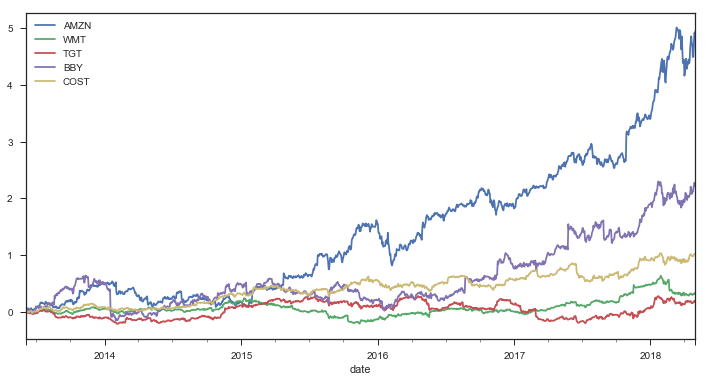

In [21]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.show()

### For the portfolio construction, we�ll compute momentum over a certain lookback, then rank in descending order and standardize:

In [30]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

### With this transform function in hand, we can set up a strategy backtesting function that computes a portfolio for a particular lookback and holding period (days between trading), returning the overall Sharpe ratio

In [31]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

### When called with the prices and a parameter combination, this function returns a scalar value:

In [32]:
strat_sr(px, 70, 30)

C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


0.06557277314844359

### From there, you can evaluate the strat_sr function over a grid of parameters, storing them as you go in a defaultdict and finally putting the results in a DataFrame:

In [33]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


## Results

### To visualize the results and get an idea of what�s going on, here is a function that uses matplotlib to produce a heatmap with some adornments:

In [34]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

### Figure. Heatmap of momentum strategy Sharpe ratio (higher is better) over various lookbacks and holding periods

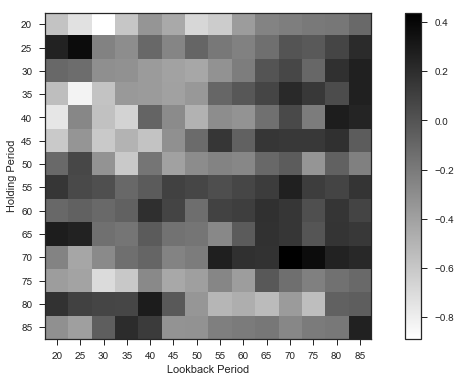

In [35]:
heatmap(ddf)
plt.show()

## Future Work, Discussion Conclusions, and Next Steps

## References

## Literature Review

In the book "Practical Time Series Analysis: Master Time Series Data Processing, Visualization, and Modeling Using Python� by Dr. Avishek Pal, the author describes practical methods of how to process and visualize time series data. Dr. Pal brought up the notion that in order to perform meaningful statistics, data should be aggregated and resampled over periods that are longer than the granular time indices in the existing data set.
    
The author describes a number of practical steps to pre-process the data, but specifically resampling and group-by operations are both very useful techniques to reduce the noise and at the same time smooth the original time series. But sometimes continuous or running aggregates of time series are required for analysis. One technique is to compute aggregates over windows of time periods, this is known as calculating moving statistics. Finally, Dr. Pal, dives into more complex topics like deep learning for time series forecasting. Those topics include training recurrent neural networks and solving the long-range dependency problem in relation to time series.
